In [107]:
#mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [108]:
import csv
import folium
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)

# sklearn: 
# Import necessary packages
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
import plotly.graph_objs as go
import plotly as plt
import seaborn as sns
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")


# folium: 
from folium import plugins
from folium.plugins import HeatMap
import csv
import folium
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

# sklearn: 
# Import necessary packages
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
import plotly.graph_objs as go
import plotly as plt
import seaborn as sns
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")


# folium: 
from folium import plugins
from folium.plugins import HeatMap



import colorlover as cl
from IPython.display import HTML
from IPython.display import display
import pandas as pd

# Pretty display for notebooks
%matplotlib inline



import colorlover as cl
from IPython.display import HTML
from IPython.display import display
import pandas as pd

# Pretty display for notebooks
%matplotlib inline

In [109]:
from pandas_profiling import ProfileReport


# **DATA LOADING AND CLEANING**

In [110]:
#read in the data
import pandas as pd
df = pd.read_csv('gdrive/MyDrive/Retentiondf.csv')

In [111]:
#display first five entry of data for an understanding of the data
df.head()

,Unnamed: 0,Project_StudentID,YearOfEntry,Year,Course Code,Course Title,Faculty,Subject Group,Term Time Postcode,Home Postcode,POLAR4 Quintile (home postcode),Local/Not Local (home postcode),Start Date,End Date,Expected Length of Study,Ethnicity,Ethnicity Group,Sex,Term Time Accomodation,Do an entrant's parents have HE qualifications?,Exit,Reason for Leaving,Age Group,Highest qualification on entry,Disability,Disability Group,Tariff Points,Tariff Point Groups
0,1,346467806,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU9 4BL,HU9 4BL,1,Local,11/09/2019,02/10/2019,3,White,White,Female,Parental/guardian home,Don't know/Unknown,Exit,Health reasons,Mature (>21),Level 3 qualification (including A levels and ...,Mental health condition,Yes,0,Zero or Unknown
1,2,942040618,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU6 8TB,HU6 8TB,4,Local,11/09/2019,02/10/2019,3,White,White,Male,Own residence,No,Exit,Other,Mature (>21),Other qualification,No known disability,No,0,Zero or Unknown
2,3,345286047,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,YO61 1YB,YO61 1YB,5,Not Local,11/09/2019,16/10/2019,3,White,White,Female,Parental/guardian home,No,Exit,Other personal reasons & dropped out,Young (<21),Level 3 qualification (including A levels and ...,No known disability,No,192,192-207
3,4,823555131,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU14 3PH,HU14 3PH,5,Local,11/09/2019,NaN,3,White,White,Female,Parental/guardian home,Yes,NaN,NaN,Young (<21),Level 3 qualification (including A levels and ...,No known disability,No,0,Zero or Unknown
4,5,974604893,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU14 3DZ,HU15 1TJ,5,Local,11/09/2019,NaN,3,White,White,Female,Own residence,Yes,NaN,NaN,Mature (>21),Other undergraduate qualification,No known disability,No,0,Zero or Unknown


In [112]:
#remove the unnamed column
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [113]:
df.head()

,Project_StudentID,YearOfEntry,Year,Course Code,Course Title,Faculty,Subject Group,Term Time Postcode,Home Postcode,POLAR4 Quintile (home postcode),Local/Not Local (home postcode),Start Date,End Date,Expected Length of Study,Ethnicity,Ethnicity Group,Sex,Term Time Accomodation,Do an entrant's parents have HE qualifications?,Exit,Reason for Leaving,Age Group,Highest qualification on entry,Disability,Disability Group,Tariff Points,Tariff Point Groups
0,346467806,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU9 4BL,HU9 4BL,1,Local,11/09/2019,02/10/2019,3,White,White,Female,Parental/guardian home,Don't know/Unknown,Exit,Health reasons,Mature (>21),Level 3 qualification (including A levels and ...,Mental health condition,Yes,0,Zero or Unknown
1,942040618,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU6 8TB,HU6 8TB,4,Local,11/09/2019,02/10/2019,3,White,White,Male,Own residence,No,Exit,Other,Mature (>21),Other qualification,No known disability,No,0,Zero or Unknown
2,345286047,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,YO61 1YB,YO61 1YB,5,Not Local,11/09/2019,16/10/2019,3,White,White,Female,Parental/guardian home,No,Exit,Other personal reasons & dropped out,Young (<21),Level 3 qualification (including A levels and ...,No known disability,No,192,192-207
3,823555131,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU14 3PH,HU14 3PH,5,Local,11/09/2019,NaN,3,White,White,Female,Parental/guardian home,Yes,NaN,NaN,Young (<21),Level 3 qualification (including A levels and ...,No known disability,No,0,Zero or Unknown
4,974604893,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU14 3DZ,HU15 1TJ,5,Local,11/09/2019,NaN,3,White,White,Female,Own residence,Yes,NaN,NaN,Mature (>21),Other undergraduate qualification,No known disability,No,0,Zero or Unknown


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5742 entries, 0 to 5741
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Project_StudentID                                5742 non-null   int64 
 1   YearOfEntry                                      5742 non-null   int64 
 2   Year                                             5742 non-null   object
 3   Course Code                                      5742 non-null   object
 4   Course Title                                     5742 non-null   object
 5   Faculty                                          5742 non-null   object
 6   Subject Group                                    5742 non-null   object
 7   Term Time Postcode                               5742 non-null   object
 8   Home Postcode                                    5742 non-null   object
 9   POLAR4 Quintile (home postcode)          

In [115]:
duf= df.duplicated()

In [116]:
#fill in the null value of the exit column 
df[['Exit']] = df[['Exit']].fillna(value='Completed')


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5742 entries, 0 to 5741
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Project_StudentID                                5742 non-null   int64 
 1   YearOfEntry                                      5742 non-null   int64 
 2   Year                                             5742 non-null   object
 3   Course Code                                      5742 non-null   object
 4   Course Title                                     5742 non-null   object
 5   Faculty                                          5742 non-null   object
 6   Subject Group                                    5742 non-null   object
 7   Term Time Postcode                               5742 non-null   object
 8   Home Postcode                                    5742 non-null   object
 9   POLAR4 Quintile (home postcode)          

In [118]:
# Rename Columns
# Renaming certain columns for better readability
df = df.rename(columns={
                        'Expected Length of Study':'ExpectedLengthofStudy',  
                        'Course Code':'CourseCode',
                        'Course Title':'CourseTitle',
                        'Subject Group':'SubjectGroup',
                        'Term Time Postcode':'TermTimePostcode',
                        'Home Postcode':'HomePostcode',
                        'POLAR4 Quintile (home postcode)':'POLAR4Quintile(homepostcode)',
                        'Local/Not Local (home postcode)':'LocalNotLocalHomepostcode',
                        'Tariff Points':'TariffPoints',
                        'Disability Group':'DisabilityGroup',
                        'Age Group':'AgeGroup',
                        'Term Time Accomodation':'TermTimeAccomodation',
                        'Reason for Leaving':'ReasonforLeaving',
                        'Start Date':'StartDate',
                        'End Date':'EndDate',
                        'Do an entrant s parents have HE qualifications?':'EducatedParents'

                        })

In [119]:
#remove aprostophe from the column names
df.columns = df.columns.str.replace("'"," ")


In [120]:
df = df.drop_duplicates( keep='last')


In [121]:
#fill the null values in the reason for leaving with 'Not Applicable'
df[['ReasonforLeaving']] = df[['ReasonforLeaving']].fillna(value='Not Applicable')


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5742 entries, 0 to 5741
Data columns (total 27 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Project_StudentID                                5742 non-null   int64 
 1   YearOfEntry                                      5742 non-null   int64 
 2   Year                                             5742 non-null   object
 3   CourseCode                                       5742 non-null   object
 4   CourseTitle                                      5742 non-null   object
 5   Faculty                                          5742 non-null   object
 6   SubjectGroup                                     5742 non-null   object
 7   TermTimePostcode                                 5742 non-null   object
 8   HomePostcode                                     5742 non-null   object
 9   POLAR4Quintile(homepostcode)             

In [123]:
df.head()

,Project_StudentID,YearOfEntry,Year,CourseCode,CourseTitle,Faculty,SubjectGroup,TermTimePostcode,HomePostcode,POLAR4Quintile(homepostcode),LocalNotLocalHomepostcode,StartDate,EndDate,ExpectedLengthofStudy,Ethnicity,Ethnicity Group,Sex,TermTimeAccomodation,Do an entrant s parents have HE qualifications?,Exit,ReasonforLeaving,AgeGroup,Highest qualification on entry,Disability,DisabilityGroup,TariffPoints,Tariff Point Groups
0,346467806,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU9 4BL,HU9 4BL,1,Local,11/09/2019,02/10/2019,3,White,White,Female,Parental/guardian home,Don't know/Unknown,Exit,Health reasons,Mature (>21),Level 3 qualification (including A levels and ...,Mental health condition,Yes,0,Zero or Unknown
1,942040618,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU6 8TB,HU6 8TB,4,Local,11/09/2019,02/10/2019,3,White,White,Male,Own residence,No,Exit,Other,Mature (>21),Other qualification,No known disability,No,0,Zero or Unknown
2,345286047,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,YO61 1YB,YO61 1YB,5,Not Local,11/09/2019,16/10/2019,3,White,White,Female,Parental/guardian home,No,Exit,Other personal reasons & dropped out,Young (<21),Level 3 qualification (including A levels and ...,No known disability,No,192,192-207
3,823555131,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU14 3PH,HU14 3PH,5,Local,11/09/2019,NaN,3,White,White,Female,Parental/guardian home,Yes,Completed,Not Applicable,Young (<21),Level 3 qualification (including A levels and ...,No known disability,No,0,Zero or Unknown
4,974604893,2019,19/20,UGNUAAXF,Nursing (Adult),FoHS,Nursing,HU14 3DZ,HU15 1TJ,5,Local,11/09/2019,NaN,3,White,White,Female,Own residence,Yes,Completed,Not Applicable,Mature (>21),Other undergraduate qualification,No known disability,No,0,Zero or Unknown


In [124]:
display(df.iloc[3])


Project_StudentID                                                                          823555131
YearOfEntry                                                                                     2019
Year                                                                                           19/20
CourseCode                                                                                  UGNUAAXF
CourseTitle                                                                          Nursing (Adult)
Faculty                                                                                         FoHS
SubjectGroup                                                                               Nursing  
TermTimePostcode                                                                            HU14 3PH
HomePostcode                                                                                HU14 3PH
POLAR4Quintile(homepostcode)                                                               

In [125]:
# Rename Columns
# Renaming certain columns for better readability
df = df.rename(columns={
                        'Expected Length of Study':'ExpectedLengthofStudy',  
                        'Course Code':'CourseCode',
                        'Course Title':'CourseTitle',
                        'Subject Group':'SubjectGroup',
                        'Term Time Postcode':'TermTimePostcode',
                        'Home Postcode':'HomePostcode',
                        'POLAR4 Quintile (home postcode)':'POLAR4Quintile(homepostcode)',
                        'Local/Not Local (home postcode)':'LocalNotLocalHomepostcode',
                        'Tariff Points':'TariffPoints',
                        'Disability Group':'DisabilityGroup',
                        'Age Group':'AgeGroup',
                        'Term Time Accomodation':'TermTimeAccomodation',
                        'Reason for Leaving':'ReasonforLeaving',
                        'Start Date':'StartDate',
                        'End Date':'EndDate',
                        'Do an entrant s parents have HE qualifications?':'EducatedParents'

                        })

In [126]:
df_new = df[['CourseCode', 'SubjectGroup','TermTimePostcode', 'HomePostcode','StartDate', 'EndDate','Ethnicity', 'LocalNotLocalHomepostcode','ExpectedLengthofStudy', 'AgeGroup', 'Highest qualification on entry', 'Sex','TermTimeAccomodation','EducatedParents','ReasonforLeaving','TariffPoints', 'Exit', 'DisabilityGroup']]


In [127]:
df[['ReasonforLeaving']] = df[['ReasonforLeaving']].fillna(value='Not Applicable')


In [128]:
df_new.head()

,CourseCode,SubjectGroup,TermTimePostcode,HomePostcode,StartDate,EndDate,Ethnicity,LocalNotLocalHomepostcode,ExpectedLengthofStudy,AgeGroup,Highest qualification on entry,Sex,TermTimeAccomodation,EducatedParents,ReasonforLeaving,TariffPoints,Exit,DisabilityGroup
0,UGNUAAXF,Nursing,HU9 4BL,HU9 4BL,11/09/2019,02/10/2019,White,Local,3,Mature (>21),Level 3 qualification (including A levels and ...,Female,Parental/guardian home,Don't know/Unknown,Health reasons,0,Exit,Yes
1,UGNUAAXF,Nursing,HU6 8TB,HU6 8TB,11/09/2019,02/10/2019,White,Local,3,Mature (>21),Other qualification,Male,Own residence,No,Other,0,Exit,No
2,UGNUAAXF,Nursing,YO61 1YB,YO61 1YB,11/09/2019,16/10/2019,White,Not Local,3,Young (<21),Level 3 qualification (including A levels and ...,Female,Parental/guardian home,No,Other personal reasons & dropped out,192,Exit,No
3,UGNUAAXF,Nursing,HU14 3PH,HU14 3PH,11/09/2019,NaN,White,Local,3,Young (<21),Level 3 qualification (including A levels and ...,Female,Parental/guardian home,Yes,Not Applicable,0,Completed,No
4,UGNUAAXF,Nursing,HU14 3DZ,HU15 1TJ,11/09/2019,NaN,White,Local,3,Mature (>21),Other undergraduate qualification,Female,Own residence,Yes,Not Applicable,0,Completed,No


In [129]:
df_new['AgeGroup'] = df_new['AgeGroup'].replace(['Young (<21)'],'Young')


In [130]:
df_new['AgeGroup'] = df_new['AgeGroup'].replace('Mature (>21)', 'Mature')


In [131]:
High_list = df_new["Highest qualification on entry"].tolist()

In [132]:
df2 = pd.unique(df_new[['Highest qualification on entry']].values.ravel('K'))


In [133]:
df4 = pd.unique(df_new[['Highest qualification on entry']].values.ravel('K'))


In [134]:
df2

array(['Level 3 qualification (including A levels and Highers)',
       'Other qualification', 'Other undergraduate qualification',
       'First degree', 'Not known', 'Qualifications at Level 2 and below',
       'No formal qualification', 'PGCE', 'Postgraduate (excluding PGCE)'],
      dtype=object)

In [135]:
df_new['Highest qualification on entry'] = df_new['Highest qualification on entry'].replace(['Level 3 qualification (including A levels and Highers)'],'Level 3')


In [136]:
df_new['Highest qualification on entry'] = df_new['Highest qualification on entry'].replace(['Qualifications at Level 2 and below'],'Level 2')


In [137]:
df_new['Highest qualification on entry'] = df_new['Highest qualification on entry'].replace(['Postgraduate (excluding PGCE)'],'Postgraduate')


In [138]:
df_new['Highest qualification on entry'] = df_new['Highest qualification on entry'].replace(['No formal qualification'],'None')


In [139]:
df_new['Highest qualification on entry'] = df_new['Highest qualification on entry'].replace(['Other qualification'],'Other')


In [140]:
df3 = pd.unique(df_new[['ReasonforLeaving']].values.ravel('K'))


In [141]:
df3

array(['Health reasons', 'Other', 'Other personal reasons & dropped out',
       'Not Applicable', 'Successful completion of course',
       'Transferred to another provider', 'Gone into employment',
       'Financial reasons', 'Exclusion',
       'Academic failure/left in bad standing/not permitted to progress'],
      dtype=object)

In [142]:
df4= pd.unique(df_new[['CourseCode']].values.ravel('K'))


In [143]:
df_new.rename(columns = {'Highest qualification on entry':'Highestqualificationonentry'}, inplace = True)


In [144]:
df_new['ReasonforLeaving'] = df_new['ReasonforLeaving'].replace(['Academic failure/left in bad standing/not permitted to progress'],'Failure')


In [145]:
df_new['ReasonforLeaving'] = df_new['ReasonforLeaving'].replace(['Other personal reasons & dropped out'],'Other')


In [146]:
df_new['ReasonforLeaving'] = df_new['ReasonforLeaving'].replace(['Transferred to another provider'],'Transferred')


In [147]:
df_new['ReasonforLeaving'] = df_new['ReasonforLeaving'].replace(['Successful completion of course'],'Not Applicable')


In [148]:
df_new['ReasonforLeaving'] = df_new['ReasonforLeaving'].replace(['Gone into employment'],'Employment')


In [149]:
numeric_features = df_new.select_dtypes(include=[np.number])
categorical_features = df_new.select_dtypes(include=[np.object])

print('Numeric Features:\n', numeric_features.columns)
print('Categorical Features:\n', categorical_features.columns)

Numeric Features:
 Index(['ExpectedLengthofStudy', 'TariffPoints'], dtype='object')
Categorical Features:
 Index(['CourseCode', 'SubjectGroup', 'TermTimePostcode', 'HomePostcode',
       'StartDate', 'EndDate', 'Ethnicity', 'LocalNotLocalHomepostcode',
       'AgeGroup', 'Highestqualificationonentry', 'Sex',
       'TermTimeAccomodation', 'EducatedParents', 'ReasonforLeaving', 'Exit',
       'DisabilityGroup'],
      dtype='object')


## **EXPLORATORY DATA ANALYSIS**

In [150]:
round(df_new.Exit.value_counts(1), 2)


Completed    0.93
Exit         0.07
Name: Exit, dtype: float64

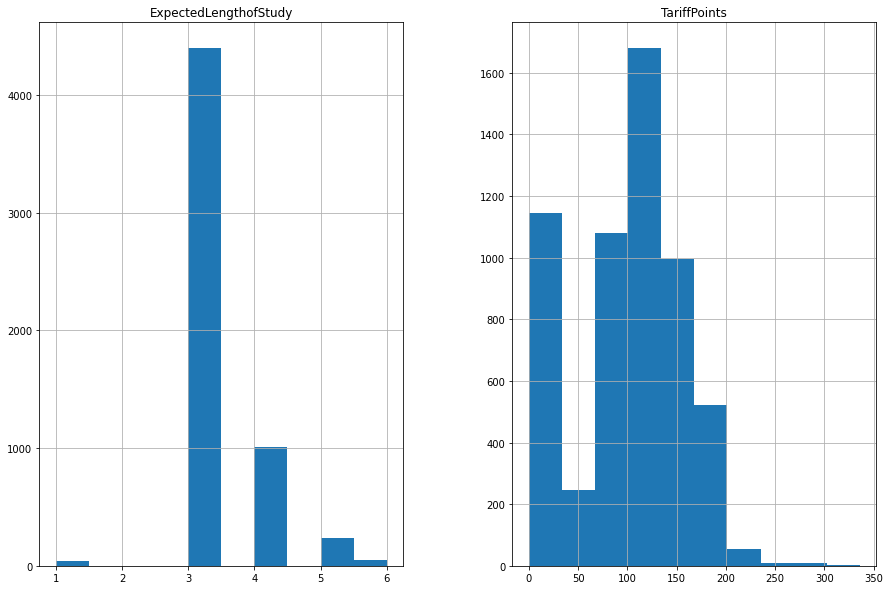

In [151]:
# create a histogram plot of each Numerical variable
ax = df_new.hist(figsize=(15,10))
plt.show()

In [153]:
 df_new.select_dtypes(include=[np.number]).isnull().sum()


ExpectedLengthofStudy    0
TariffPoints             0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

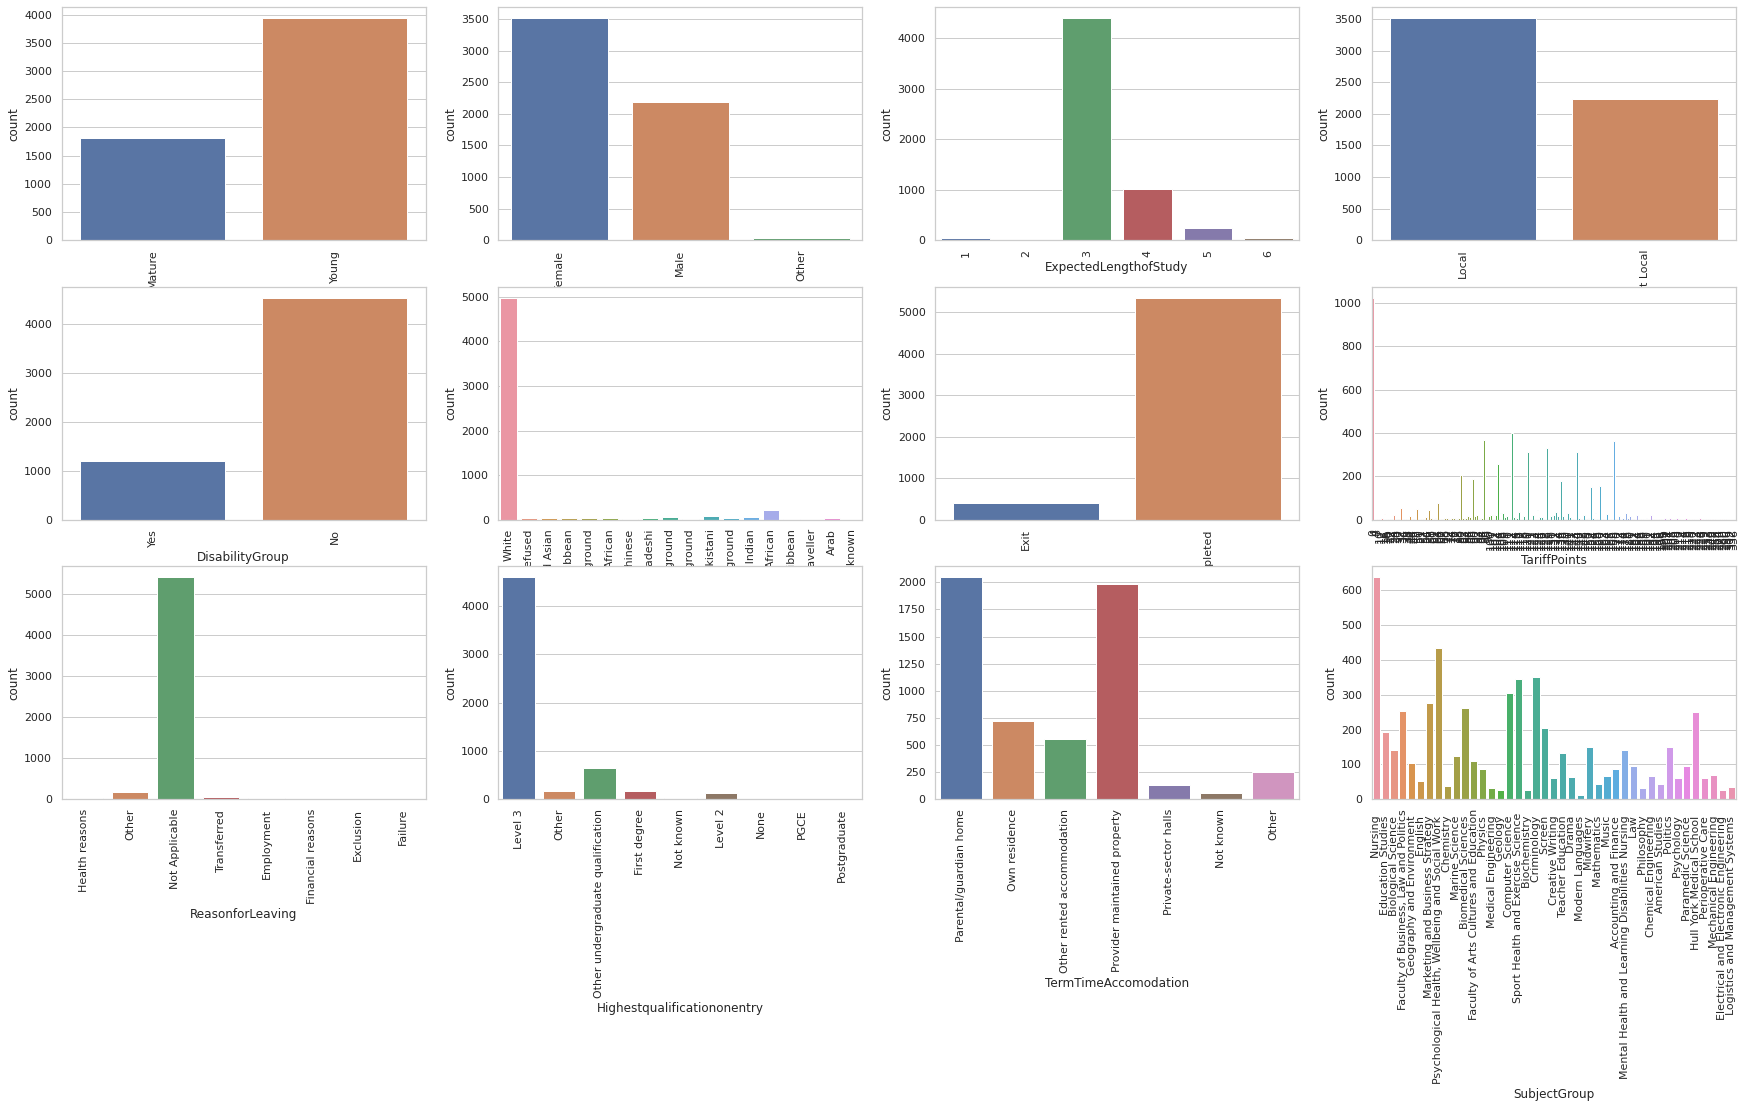

In [248]:
#countplots for all catogorical variables mentioned above 

fig = plt.figure(figsize = (30,30))
     

ax1 = fig.add_subplot(6,4,1)
sns.countplot(data = df_new, x = 'AgeGroup', ax=ax1)
plt.xticks(rotation=90)
ax2 = fig.add_subplot(6,4,2)
sns.countplot(data = df_new, x = 'Sex', ax=ax2)
plt.xticks(rotation=90)
ax3 = fig.add_subplot(6,4,3)
sns.countplot(data = df_new, x = 'ExpectedLengthofStudy', ax=ax3)
plt.xticks(rotation=90)
ax4 = fig.add_subplot(6,4,4)
sns.countplot(data = df_new, x = 'LocalNotLocalHomepostcode', ax=ax4)
plt.xticks(rotation=90)
ax5 = fig.add_subplot(6,4,5)
sns.countplot(data = df_new, x = 'DisabilityGroup', ax=ax5)
plt.xticks(rotation=90)
ax6 = fig.add_subplot(6,4,6)
sns.countplot(data = df_new, x = 'Ethnicity', ax=ax6)
plt.xticks(rotation=90)
ax7 = fig.add_subplot(6,4,7)
sns.countplot(data = df_new, x = 'Exit', ax=ax7)
plt.xticks(rotation=90)
ax8 = fig.add_subplot(6,4,8)
sns.countplot(data = df_new, x = 'TariffPoints', ax=ax8)
plt.xticks(rotation=90)
ax9 = fig.add_subplot(6,4,9)
sns.countplot(data = df_new, x = 'ReasonforLeaving', ax=ax9)
plt.xticks(rotation=90)
ax10 = fig.add_subplot(6,4,10)
sns.countplot(data = df_new, x = 'Highestqualificationonentry', ax=ax10)
plt.xticks(rotation=90)
ax11 = fig.add_subplot(6,4,11)
sns.countplot(data = df_new, x = 'TermTimeAccomodation', ax=ax11)
plt.xticks(rotation=90)
ax12 = fig.add_subplot(6,4,12)
sns.countplot(data = df_new, x = 'SubjectGroup', ax=ax12)
plt.xticks(rotation=90)




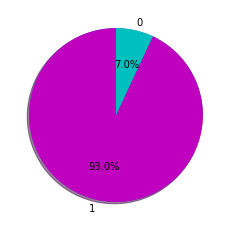

In [155]:
plt.pie(df_new["Exit"].value_counts())

#piechart
slices=df_new["Exit"].value_counts()
names=["1","0"]
cols=["m","c"]

plt.pie(slices,labels=names,colors=cols,startangle=90,shadow=True,autopct="%1.1f%%")

plt.show()

In [156]:
## Exit  vs Sex
#sns.boxplot(y='Exit', x='Sex', data=df)

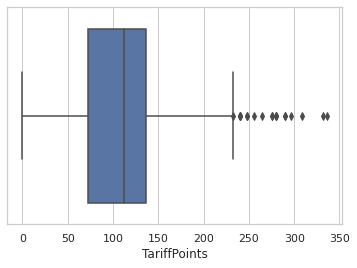

In [157]:
#Tariff points of students
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_new["TariffPoints"])
# we can see there are outliers far from both high and low bounds , frst we deal with null values and then with outliers 

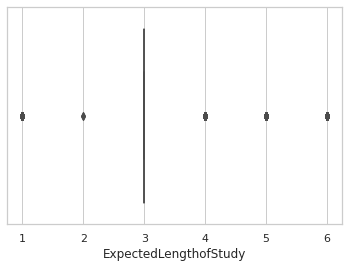

In [158]:
#Student Age group
sns.set(style="whitegrid")
ax = sns.boxplot(x=df_new["ExpectedLengthofStudy"])
# we can see there are outliers far from both high and low bounds , frst we deal with null values and then with outliers 

In [159]:
round(df_new.describe(), 2)

,ExpectedLengthofStudy,TariffPoints
count,5742.00,5742.00
mean,3.27,97.72
std,0.62,57.12
min,1.00,0.00
25%,3.00,72.00
50%,3.00,112.00
75%,3.00,136.00
max,6.00,336.00


In [160]:
df_new.describe(include='all') 

,CourseCode,SubjectGroup,TermTimePostcode,HomePostcode,StartDate,EndDate,Ethnicity,LocalNotLocalHomepostcode,ExpectedLengthofStudy,AgeGroup,Highestqualificationonentry,Sex,TermTimeAccomodation,EducatedParents,ReasonforLeaving,TariffPoints,Exit,DisabilityGroup
count,5742,5742,5742,5742,5742,400,5742,5742,5742.000000,5742,5742,5742,5742,5742,5742,5742.000000,5742,5742
unique,166,41,2883,5059,119,202,18,2,NaN,2,9,3,7,4,8,NaN,2,2
top,UGNUADXF,Nursing,HU6 7EL,HU17 9GD,17/09/2019,24/05/2020,White,Local,NaN,Young,Level 3,Female,Parental/guardian home,No,Not Applicable,NaN,Completed,No
freq,552,636,975,6,705,46,4974,3511,NaN,3937,4593,3514,2045,3200,5410,NaN,5342,4544
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.269767,NaN,NaN,NaN,NaN,NaN,NaN,97.716649,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.616378,NaN,NaN,NaN,NaN,NaN,NaN,57.121374,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,72.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,112.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,136.000000,NaN,NaN


In [163]:
def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

**DATA VISUALIZATION OF SUBJECT GROUP WITH EXIT COUNT**

count          5742
unique           41
top       Nursing  
freq            636
Name: SubjectGroup, dtype: object
mode:  0    Nursing  
dtype: object
Nursing                                              636
Psychological Health, Wellbeing and Social Work      435
Criminology                                          350
Sport Health and Exercise Science                    346
Computer Science                                     304
Marketing and Business Strategy                      276
Biomedical Sciences                                  262
Faculty of Business, Law and Politics                254
Hull York Medical School                             251
Screen                                               203
Education Studies                                    192
Politics                                             151
Midwifery                                            149
Mental Health and Learning Disabilities Nursing      140
Biological Science                                  

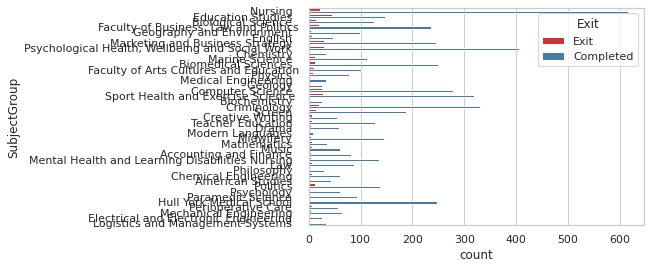

In [164]:
#Bivariate analysis
# Feature Variable: StudentGroup
#no missing values so can be taken as it is 
categorical_summarized(df_new, y = 'SubjectGroup', hue='Exit', palette='Set1')

**DATA VISUALIZATION OF TERM TIME ACCOMODATION WITH EXIT COUNT**

count                       5742
unique                         7
top       Parental/guardian home
freq                        2045
Name: TermTimeAccomodation, dtype: object
mode:  0    Parental/guardian home
dtype: object
Parental/guardian home          2045
Provider maintained property    1982
Own residence                    726
Other rented accommodation       554
Other                            252
Private-sector halls             128
Not known                         55
Name: TermTimeAccomodation, dtype: int64


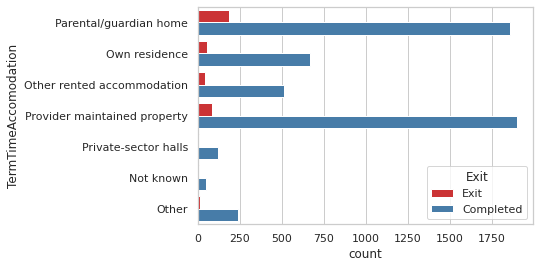

In [165]:
#Bivariate analysis
# Feature Variable: TermTime Accomodation

categorical_summarized(df_new, y = 'TermTimeAccomodation', hue='Exit', palette='Set1')

**DATA VISUALIZATION OF DISABILITY GROUP WITH EXIT COUNT**

count     5742
unique       2
top         No
freq      4544
Name: DisabilityGroup, dtype: object
mode:  0    No
dtype: object
No     4544
Yes    1198
Name: DisabilityGroup, dtype: int64


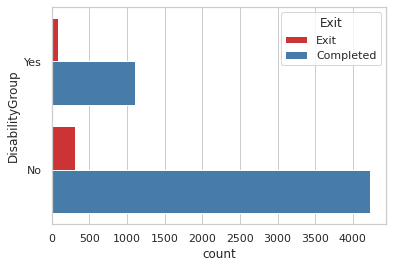

In [166]:
#Bivariate analysis
categorical_summarized(df_new, y = 'DisabilityGroup', hue='Exit', palette='Set1')

**DATA VISUALIZATION OF EDUCATED PARENTS AGAINST EXIT**

count     5742
unique       4
top         No
freq      3200
Name: EducatedParents, dtype: object
mode:  0    No
dtype: object
No                     3200
Yes                    2022
Don't know/Unknown      439
Information refused      81
Name: EducatedParents, dtype: int64


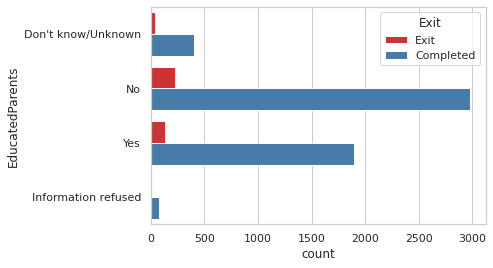

In [167]:
#Bivariate analysis
categorical_summarized(df_new, y = 'EducatedParents', hue='Exit', palette='Set1')

**DATA VISUALIZATION OF LOCAL AND NOT LOCAL HOME POSTCODE WITH EXIT COUNT**

count      5742
unique        2
top       Local
freq       3511
Name: LocalNotLocalHomepostcode, dtype: object
mode:  0    Local
dtype: object
Local        3511
Not Local    2231
Name: LocalNotLocalHomepostcode, dtype: int64


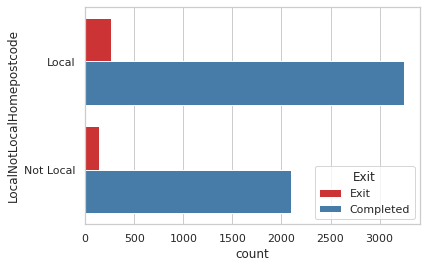

In [168]:
#Bivariate analysis
categorical_summarized(df_new, y = 'LocalNotLocalHomepostcode', hue='Exit', palette='Set1')

**DATA VISUALIZATION OF ETHNICITY WITH EXIT COUNT**

count      5742
unique       18
top       White
freq       4974
Name: Ethnicity, dtype: object
mode:  0    White
dtype: object
White                                   4974
Black or Black British - African         216
Asian or Asian British - Pakistani        78
Other Asian background                    61
Asian or Asian British - Indian           54
Mixed - White and Asian                   47
Information refused                       47
Asian or Asian British - Bangladeshi      42
Other ethnic background                   38
Other mixed background                    37
Mixed - White and Black African           34
Mixed - White and Black Caribbean         32
Arab                                      32
Other Black background                    18
Black or Black British - Caribbean        13
Chinese                                   11
Not known                                  5
Gypsy or Traveller                         3
Name: Ethnicity, dtype: int64


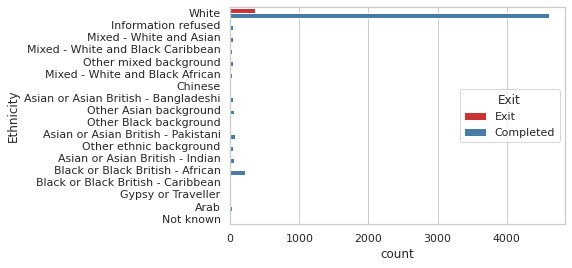

In [169]:
#Bivariate analysis
categorical_summarized(df_new, y = 'Ethnicity', hue='Exit', palette='Set1')

**DATA VISUALIZATION OF AGEGROUP WITH EXIT**





count      5742
unique        2
top       Young
freq       3937
Name: AgeGroup, dtype: object
mode:  0    Young
dtype: object
Young     3937
Mature    1805
Name: AgeGroup, dtype: int64


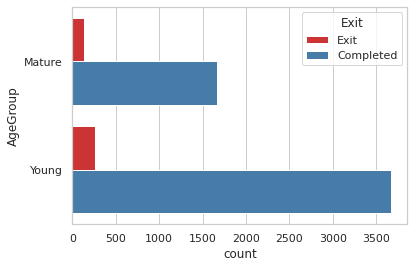

In [170]:
#Bivariate analysis for AGEGROUP
categorical_summarized(df_new, y = 'AgeGroup', hue='Exit', palette='Set1')

**DATA VISUALIZATION OF GENDER WITH EXIT**


count       5742
unique         3
top       Female
freq        3514
Name: Sex, dtype: object
mode:  0    Female
dtype: object
Female    3514
Male      2192
Other       36
Name: Sex, dtype: int64


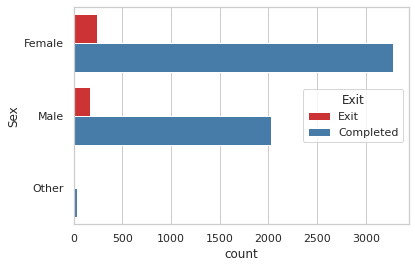

In [171]:
categorical_summarized(df_new, y = 'Sex', hue='Exit', palette='Set1')


**DATA VISUALIZATION OF HIGHEST QUALIFICATION ON ENTRY WITH EXIT**


count        5742
unique          9
top       Level 3
freq         4593
Name: Highestqualificationonentry, dtype: object
mode:  0    Level 3
dtype: object
Level 3                              4593
Other undergraduate qualification     645
Other                                 163
First degree                          162
Level 2                               133
Not known                              22
Postgraduate                           12
None                                   11
PGCE                                    1
Name: Highestqualificationonentry, dtype: int64


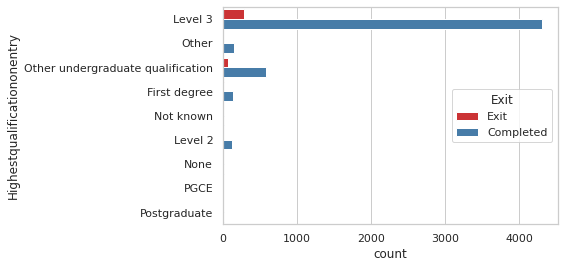

In [243]:
categorical_summarized(df_new, y = 'Highestqualificationonentry', hue='Exit', palette='Set1')


In [172]:
#df_new["Exit"].loc[df_new["Exit"]=="Completed"]=1
#df_new["Exit"].loc[df_new["Exit"]=="Exit"]=0

In [173]:
# define categorical feature columns
category_cols = [ 'LocalNotLocalHomepostcode','ExpectedLengthofStudy', 'StartDate', 'EndDate','AgeGroup', 'Ethnicity','SubjectGroup' ,'Highestqualificationonentry', 'Sex','TermTimeAccomodation','EducatedParents','TariffPoints', 'DisabilityGroup']

# define target col
target_col = ['Exit']

cols = category_cols  + target_col

# copy dataframe - just to be safe
df_nw = df_new[cols].copy()
df_nw.shape

(5742, 14)

**MODELLING**

In [174]:
#create dummy variables from the categorical features
dummies = pd.get_dummies(df_new[category_cols], drop_first=True)

dfK = pd.concat([ df_new[target_col], dummies], axis=1)
dfK.shape

(5742, 401)

In [175]:
dfK.head()

,Exit,ExpectedLengthofStudy,TariffPoints,LocalNotLocalHomepostcode_Not Local,StartDate_01/10/2019,StartDate_01/10/2020,StartDate_02/09/2020,StartDate_02/10/2019,StartDate_02/10/2020,StartDate_02/11/2020,StartDate_02/12/2020,StartDate_03/01/2020,StartDate_03/02/2020,StartDate_03/09/2020,StartDate_03/10/2019,StartDate_04/01/2021,StartDate_04/09/2020,StartDate_04/10/2019,StartDate_04/11/2020,StartDate_05/01/2021,StartDate_05/02/2020,StartDate_05/09/2020,StartDate_05/10/2020,StartDate_05/11/2020,StartDate_06/09/2020,StartDate_06/10/2020,StartDate_07/09/2020,StartDate_07/10/2019,StartDate_07/10/2020,StartDate_07/12/2020,StartDate_08/09/2020,StartDate_08/10/2019,StartDate_08/10/2020,StartDate_08/12/2020,StartDate_09/01/2020,StartDate_09/09/2020,StartDate_09/10/2019,StartDate_09/10/2020,StartDate_10/03/2021,StartDate_10/09/2020,StartDate_10/10/2019,StartDate_10/12/2020,StartDate_11/03/2021,StartDate_11/09/2019,StartDate_11/09/2020,StartDate_11/10/2019,StartDate_11/10/2020,StartDate_11/11/2020,StartDate_12/09/2019,StartDate_12/09/2020,StartDate_12/10/2020,StartDate_13/09/2020,StartDate_13/10/2020,StartDate_13/11/2020,StartDate_14/09/2019,StartDate_14/09/2020,StartDate_14/10/2020,StartDate_14/12/2020,StartDate_15/09/2020,StartDate_15/10/2019,StartDate_15/10/2020,StartDate_16/03/2021,StartDate_16/09/2019,StartDate_16/09/2020,StartDate_16/10/2019,StartDate_16/10/2020,StartDate_16/11/2020,StartDate_16/12/2020,StartDate_17/09/2019,StartDate_17/09/2020,StartDate_17/10/2019,StartDate_17/12/2020,StartDate_18/03/2021,StartDate_18/08/2020,StartDate_18/09/2019,StartDate_18/09/2020,StartDate_18/10/2019,StartDate_18/12/2020,StartDate_19/08/2020,StartDate_19/09/2019,StartDate_19/09/2020,StartDate_19/10/2020,StartDate_20/01/2020,StartDate_20/08/2020,StartDate_20/09/2019,StartDate_20/09/2020,StartDate_20/10/2020,StartDate_21/01/2021,StartDate_21/08/2020,StartDate_21/09/2020,StartDate_21/10/2020,StartDate_22/08/2020,StartDate_22/09/2020,StartDate_22/10/2019,StartDate_22/10/2020,StartDate_23/09/2019,StartDate_23/09/2020,StartDate_23/11/2020,StartDate_24/08/2020,StartDate_24/09/2019,StartDate_24/09/2020,StartDate_25/08/2020,StartDate_25/09/2019,StartDate_25/09/2020,StartDate_26/08/2020,StartDate_26/09/2019,StartDate_26/09/2020,StartDate_26/10/2020,StartDate_27/05/2021,StartDate_27/08/2020,StartDate_27/09/2019,StartDate_27/09/2020,StartDate_27/10/2020,StartDate_27/11/2020,StartDate_28/08/2020,StartDate_28/09/2020,StartDate_29/09/2020,StartDate_30/08/2020,StartDate_30/09/2019,StartDate_30/09/2020,StartDate_30/10/2020,StartDate_30/11/2020,EndDate_01/02/2020,EndDate_01/02/2021,EndDate_01/03/2020,EndDate_01/03/2021,EndDate_01/06/2020,EndDate_01/06/2021,EndDate_01/10/2019,EndDate_01/10/2020,EndDate_01/12/2020,EndDate_02/10/2019,EndDate_02/12/2020,EndDate_03/02/2020,EndDate_03/02/2021,EndDate_03/11/2020,EndDate_03/12/2020,EndDate_04/01/2021,EndDate_04/02/2020,EndDate_04/02/2021,EndDate_04/03/2020,EndDate_04/03/2021,EndDate_04/10/2019,EndDate_04/11/2019,EndDate_04/11/2020,EndDate_04/12/2019,EndDate_04/12/2020,EndDate_05/01/2021,EndDate_05/02/2021,EndDate_05/04/2021,EndDate_05/06/2021,EndDate_05/07/2021,EndDate_05/10/2020,EndDate_05/11/2019,EndDate_06/01/2020,EndDate_06/02/2021,EndDate_06/04/2021,EndDate_06/05/2020,EndDate_06/07/2020,EndDate_06/07/2021,EndDate_06/11/2019,EndDate_06/12/2019,EndDate_07/01/2020,EndDate_07/01/2021,EndDate_07/02/2020,EndDate_07/02/2021,EndDate_07/12/2020,EndDate_08/02/2021,EndDate_08/04/2021,EndDate_08/06/2021,EndDate_08/10/2019,EndDate_08/10/2020,EndDate_09/01/2021,EndDate_09/06/2021,EndDate_09/10/2019,EndDate_09/10/2020,EndDate_09/11/2020,EndDate_09/12/2019,EndDate_10/03/2020,EndDate_10/05/2021,EndDate_10/06/2021,EndDate_10/10/2019,EndDate_10/10/2020,EndDate_10/11/2020,EndDate_10/12/2019,EndDate_10/12/2020,EndDate_11/01/2021,EndDate_11/02/2020,EndDate_11/03/2020,EndDate_11/05/2021,EndDate_11/06/2020,EndDate_11/10/2019,EndDate_11/11/2019,EndDate_11/11/2020,EndDate_11/12/2020,EndDate_12/11/2020,EndDate_12/12/2019,EndDate_13/01/2021,E

In [176]:
# Train Test Split
y = dfK['Exit']
X = dfK.drop('Exit', axis=1)

In [177]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

#**DATA STATISTICS COBVEERTING TO THEIR DUMMY VARIABLES FOR BETTER INSIGHT TO DATA**

In [178]:
dfK.describe()

,ExpectedLengthofStudy,TariffPoints,LocalNotLocalHomepostcode_Not Local,StartDate_01/10/2019,StartDate_01/10/2020,StartDate_02/09/2020,StartDate_02/10/2019,StartDate_02/10/2020,StartDate_02/11/2020,StartDate_02/12/2020,StartDate_03/01/2020,StartDate_03/02/2020,StartDate_03/09/2020,StartDate_03/10/2019,StartDate_04/01/2021,StartDate_04/09/2020,StartDate_04/10/2019,StartDate_04/11/2020,StartDate_05/01/2021,StartDate_05/02/2020,StartDate_05/09/2020,StartDate_05/10/2020,StartDate_05/11/2020,StartDate_06/09/2020,StartDate_06/10/2020,StartDate_07/09/2020,StartDate_07/10/2019,StartDate_07/10/2020,StartDate_07/12/2020,StartDate_08/09/2020,StartDate_08/10/2019,StartDate_08/10/2020,StartDate_08/12/2020,StartDate_09/01/2020,StartDate_09/09/2020,StartDate_09/10/2019,StartDate_09/10/2020,StartDate_10/03/2021,StartDate_10/09/2020,StartDate_10/10/2019,StartDate_10/12/2020,StartDate_11/03/2021,StartDate_11/09/2019,StartDate_11/09/2020,StartDate_11/10/2019,StartDate_11/10/2020,StartDate_11/11/2020,StartDate_12/09/2019,StartDate_12/09/2020,StartDate_12/10/2020,StartDate_13/09/2020,StartDate_13/10/2020,StartDate_13/11/2020,StartDate_14/09/2019,StartDate_14/09/2020,StartDate_14/10/2020,StartDate_14/12/2020,StartDate_15/09/2020,StartDate_15/10/2019,StartDate_15/10/2020,StartDate_16/03/2021,StartDate_16/09/2019,StartDate_16/09/2020,StartDate_16/10/2019,StartDate_16/10/2020,StartDate_16/11/2020,StartDate_16/12/2020,StartDate_17/09/2019,StartDate_17/09/2020,StartDate_17/10/2019,StartDate_17/12/2020,StartDate_18/03/2021,StartDate_18/08/2020,StartDate_18/09/2019,StartDate_18/09/2020,StartDate_18/10/2019,StartDate_18/12/2020,StartDate_19/08/2020,StartDate_19/09/2019,StartDate_19/09/2020,StartDate_19/10/2020,StartDate_20/01/2020,StartDate_20/08/2020,StartDate_20/09/2019,StartDate_20/09/2020,StartDate_20/10/2020,StartDate_21/01/2021,StartDate_21/08/2020,StartDate_21/09/2020,StartDate_21/10/2020,StartDate_22/08/2020,StartDate_22/09/2020,StartDate_22/10/2019,StartDate_22/10/2020,StartDate_23/09/2019,StartDate_23/09/2020,StartDate_23/11/2020,StartDate_24/08/2020,StartDate_24/09/2019,StartDate_24/09/2020,StartDate_25/08/2020,StartDate_25/09/2019,StartDate_25/09/2020,StartDate_26/08/2020,StartDate_26/09/2019,StartDate_26/09/2020,StartDate_26/10/2020,StartDate_27/05/2021,StartDate_27/08/2020,StartDate_27/09/2019,StartDate_27/09/2020,StartDate_27/10/2020,StartDate_27/11/2020,StartDate_28/08/2020,StartDate_28/09/2020,StartDate_29/09/2020,StartDate_30/08/2020,StartDate_30/09/2019,StartDate_30/09/2020,StartDate_30/10/2020,StartDate_30/11/2020,EndDate_01/02/2020,EndDate_01/02/2021,EndDate_01/03/2020,EndDate_01/03/2021,EndDate_01/06/2020,EndDate_01/06/2021,EndDate_01/10/2019,EndDate_01/10/2020,EndDate_01/12/2020,EndDate_02/10/2019,EndDate_02/12/2020,EndDate_03/02/2020,EndDate_03/02/2021,EndDate_03/11/2020,EndDate_03/12/2020,EndDate_04/01/2021,EndDate_04/02/2020,EndDate_04/02/2021,EndDate_04/03/2020,EndDate_04/03/2021,EndDate_04/10/2019,EndDate_04/11/2019,EndDate_04/11/2020,EndDate_04/12/2019,EndDate_04/12/2020,EndDate_05/01/2021,EndDate_05/02/2021,EndDate_05/04/2021,EndDate_05/06/2021,EndDate_05/07/2021,EndDate_05/10/2020,EndDate_05/11/2019,EndDate_06/01/2020,EndDate_06/02/2021,EndDate_06/04/2021,EndDate_06/05/2020,EndDate_06/07/2020,EndDate_06/07/2021,EndDate_06/11/2019,EndDate_06/12/2019,EndDate_07/01/2020,EndDate_07/01/2021,EndDate_07/02/2020,EndDate_07/02/2021,EndDate_07/12/2020,EndDate_08/02/2021,EndDate_08/04/2021,EndDate_08/06/2021,EndDate_08/10/2019,EndDate_08/10/2020,EndDate_09/01/2021,EndDate_09/06/2021,EndDate_09/10/2019,EndDate_09/10/2020,EndDate_09/11/2020,EndDate_09/12/2019,EndDate_10/03/2020,EndDate_10/05/2021,EndDate_10/06/2021,EndDate_10/10/2019,EndDate_10/10/2020,EndDate_10/11/2020,EndDate_10/12/2019,EndDate_10/12/2020,EndDate_11/01/2021,EndDate_11/02/2020,EndDate_11/03/2020,EndDate_11/05/2021,EndDate_11/06/2020,EndDate_11/10/2019,EndDate_11/11/2019,EndDate_11/11/2020,EndDate_11/12/2020,EndDate_12/11/2020,EndDate_12/12/2019,EndDate_13/01/2021,EndDat

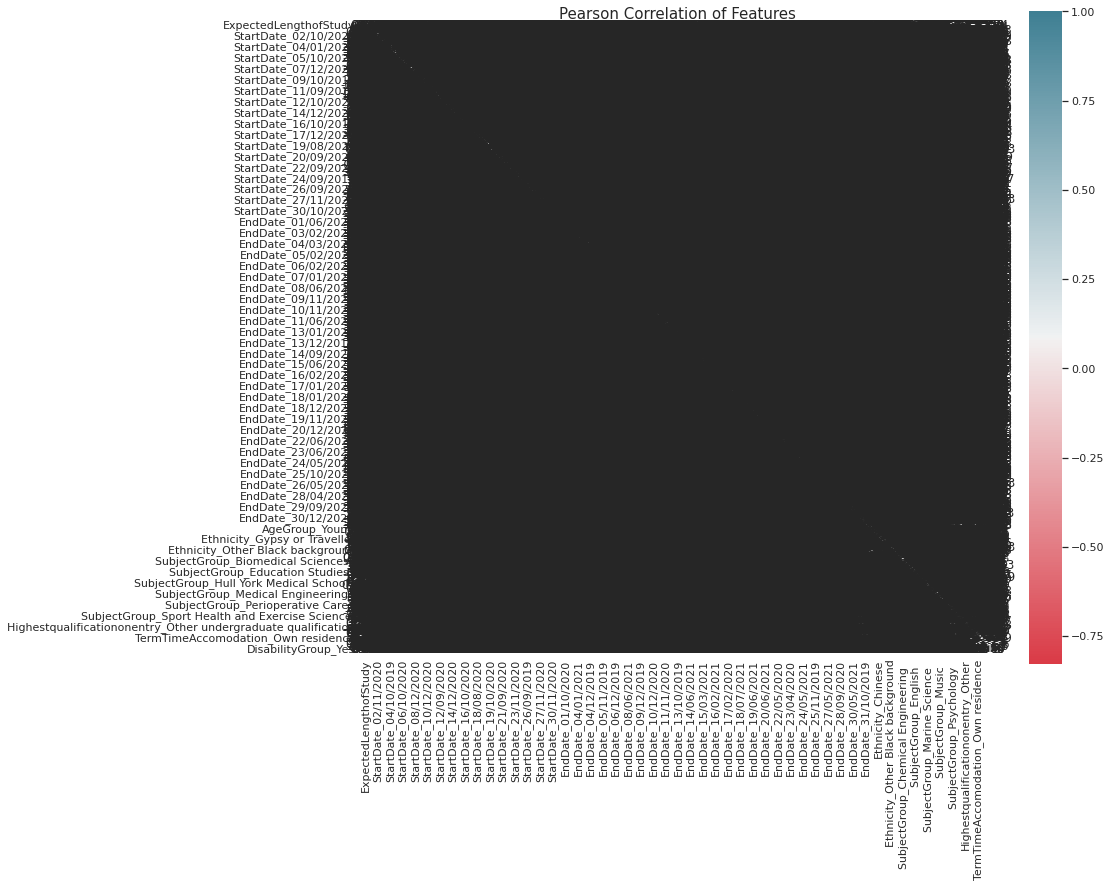

In [179]:
#to check the corrolation amoung variables 


plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(dfK.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()

In [180]:
def get_dataset():
    X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=.25,random_state=1)
    return X_train, y_train

In [181]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, 
error_score='raise')
    return scores

In [182]:
def get_models():
    models = dict()
    models['dtree'] = DecisionTreeClassifier()
    models['knn'] = KNeighborsClassifier()
    models['lr'] = LogisticRegression()
    models['rcf'] = RandomForestClassifier()
    models['nb'] = MultinomialNB()
    models['gb'] = GradientBoostingClassifier()
    
    
    return models

#**STACK MODELLING**

In [183]:
X, y = get_dataset()
#Grab the models to use.
models = get_models()
#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>dtree 0.970 (0.006)
>knn 0.930 (0.002)
>lr 0.946 (0.005)
>rcf 0.956 (0.007)
>nb 0.945 (0.011)
>gb 0.948 (0.005)


#**BOXPLOT OF ACCURACY RESULTS**

In [184]:
from matplotlib import pyplot

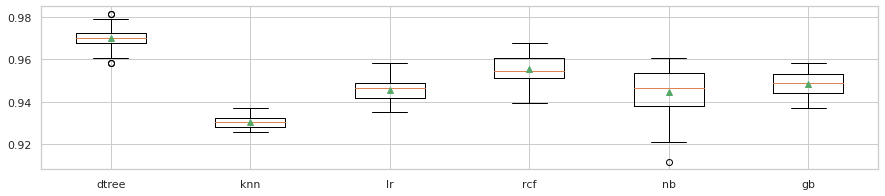

In [185]:
plt.figure(figsize=(15,3))


pyplot.boxplot(results, labels=names,  showmeans=True)


pyplot.show()

**CLASSIFCATION WITH RANDOM FOREST**

**SINCE RANDOM FOREST WORKS WELL WITH IMBALNCED DATASET AND ALSO PRODUCED A GOOD RESULT UPON STACKING WITH OTHER MODELS, I WILL PROCEED WITH THE MODELLING WITH RANDOM FOREST**

In [186]:
from sklearn.model_selection import GridSearchCV


**SPLITTING THE DATASET**

In [187]:
from sklearn.model_selection import train_test_split
# split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)




In [188]:
rf1=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)


In [189]:
rf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=400)

In [190]:
rf1.oob_score_

0.9519975224527718

In [191]:
for w in range(10,300,20):
    rf1=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    rf1.fit(X_train,y_train)
    oob=rf1.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 10
OOB score is 0.9501393620315888
************************
For n_estimators = 30
OOB score is 0.9510684422421802
************************
For n_estimators = 50
OOB score is 0.9519975224527718
************************
For n_estimators = 70
OOB score is 0.9526169092598328
************************
For n_estimators = 90
OOB score is 0.9526169092598328
************************
For n_estimators = 110
OOB score is 0.9526169092598328
************************
For n_estimators = 130
OOB score is 0.9523072158563023
************************
For n_estimators = 150
OOB score is 0.9516878290492412
************************
For n_estimators = 170
OOB score is 0.9526169092598328
************************
For n_estimators = 190
OOB score is 0.9526169092598328
************************
For n_estimators = 210
OOB score is 0.9523072158563023
************************
For n_estimators = 230
OOB score is 0.9519975224527718
************************
For n_estimators = 250
OOB score is 0.9523072

In [192]:
for w in range(240,251):
    rf1=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    rf1.fit(X_train,y_train)
    oob=rf1.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 240
OOB score is 0.9519975224527718
************************
For n_estimators = 241
OOB score is 0.9519975224527718
************************
For n_estimators = 242
OOB score is 0.9519975224527718
************************
For n_estimators = 243
OOB score is 0.9519975224527718
************************
For n_estimators = 244
OOB score is 0.9523072158563023
************************
For n_estimators = 245
OOB score is 0.9519975224527718
************************
For n_estimators = 246
OOB score is 0.9519975224527718
************************
For n_estimators = 247
OOB score is 0.9523072158563023
************************
For n_estimators = 248
OOB score is 0.9519975224527718
************************
For n_estimators = 249
OOB score is 0.9519975224527718
************************
For n_estimators = 250
OOB score is 0.9523072158563023
************************


**FEATURE IMPORTANCES**

In [193]:
rf1.feature_importances_

array([2.91089108e-02, 1.78156126e-02, 3.76061256e-03, 1.29548617e-08,
       1.00190691e-05, 2.86124341e-04, 1.98884793e-04, 1.45962776e-03,
       1.37994408e-05, 4.00733361e-04, 0.00000000e+00, 8.53122297e-08,
       6.34677686e-04, 3.91845254e-07, 0.00000000e+00, 2.03474936e-03,
       1.76043764e-05, 5.51247725e-06, 0.00000000e+00, 6.35186741e-07,
       1.37300334e-03, 1.81445838e-04, 1.13551372e-06, 5.98498996e-04,
       1.81290324e-04, 9.07299032e-04, 1.79349854e-06, 0.00000000e+00,
       5.01401433e-09, 1.07942744e-04, 4.93323672e-07, 3.46053883e-05,
       0.00000000e+00, 2.60216031e-06, 3.02590768e-04, 1.05072249e-03,
       4.99342398e-04, 0.00000000e+00, 2.74515881e-04, 2.92368279e-04,
       1.07320704e-08, 1.57072948e-06, 7.23110173e-03, 9.25368335e-04,
       1.87649376e-05, 2.60204296e-09, 4.10790597e-07, 0.00000000e+00,
       4.51347040e-04, 5.82540017e-04, 8.18597330e-04, 5.61409753e-08,
       3.02200147e-07, 1.06454183e-03, 3.78427139e-04, 8.92763897e-06,
      

In [194]:
im_feat=pd.Series(rf1.feature_importances_,index=X.columns.tolist())


In [195]:
im_feat.sort_values(ascending=False).head(15)

EndDate_24/05/2020       0.083871
EndDate_30/05/2021       0.042627
EndDate_22/05/2020       0.041726
ExpectedLengthofStudy    0.029109
EndDate_28/05/2021       0.021003
TariffPoints             0.017816
EndDate_26/05/2020       0.015637
EndDate_15/11/2020       0.012133
EndDate_31/07/2020       0.011919
EndDate_19/07/2021       0.011584
EndDate_18/12/2020       0.011347
EndDate_01/03/2021       0.008478
EndDate_31/05/2021       0.008361
EndDate_23/03/2020       0.008343
EndDate_04/02/2020       0.008125
dtype: float64

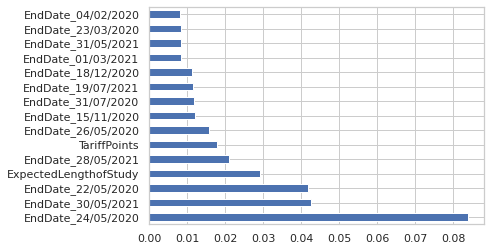

In [196]:
im_feat.sort_values(ascending=False).head(15).plot(kind='barh')

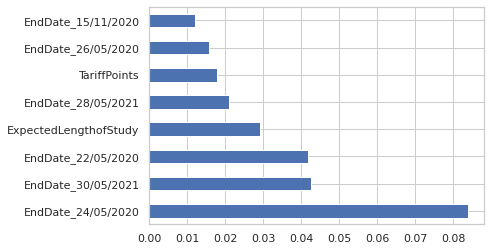

In [197]:
im_feat.sort_values(ascending=False).head(8).plot(kind='barh')


In [198]:
from sklearn.model_selection import GridSearchCV


In [199]:
param_grid = { 
    'n_estimators': [240, 251],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2,3,4,5,6,7,8,9]
}

CV_rfc = GridSearchCV(estimator=rf1, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train,y_train)
print (CV_rfc.best_params_)

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 251}


In [200]:
rf1=RandomForestClassifier(n_estimators=251,max_features='auto',max_depth=9,oob_score=True,n_jobs=-1,random_state=400)


In [201]:
rf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=251, n_jobs=-1, oob_score=True,
                       random_state=400)

In [202]:
rf1.oob_score_

0.934344998451533

In [203]:
rf1.feature_importances_

array([7.68593032e-02, 4.32026534e-03, 4.50484632e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.58647747e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.64398433e-05, 0.00000000e+00, 0.00000000e+00, 1.98252228e-04,
       7.15841796e-05, 1.70833636e-06, 0.00000000e+00, 0.00000000e+00,
       4.61923843e-04, 2.52947042e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 9.67622271e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.37372212e-06, 0.00000000e+00, 3.59155981e-05,
       0.00000000e+00, 0.00000000e+00, 6.42020288e-06, 8.91522433e-04,
       1.48808921e-04, 0.00000000e+00, 0.00000000e+00, 2.66931980e-04,
       0.00000000e+00, 0.00000000e+00, 1.23875965e-02, 1.26151537e-03,
       4.44373352e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.62385647e-04, 6.62724820e-06, 1.60893067e-04, 0.00000000e+00,
       0.00000000e+00, 3.02250956e-03, 2.59563032e-05, 3.62192887e-05,
      

**FEATURE IMPORTANCE**

In [204]:
feat_im=pd.Series(rf1.feature_importances_,index=X.columns.tolist())

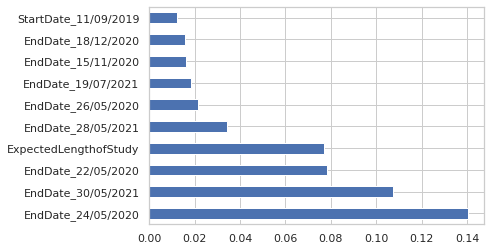

In [205]:
feat_im.sort_values(ascending=False).head(10).plot(kind='barh')

In [206]:
#These are  the key factors affecting the student attrition


In [207]:
from pandas import read_csv, DataFrame
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from os import system

In [208]:
# decision tree gave low accuracy than random forest

import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9526462395543176

In [209]:
# instantiate RandomForestClassifier with entropy and class_weight
forest_1 = RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=400, verbose=0,
                       warm_start=False)



RandomForestClassifier(n_estimators=80, n_jobs=-1, oob_score=True,
                       random_state=400)

**CLASSIFCATION REPORT**

In [210]:
# train
#forest_1.fit(X_train, y_train)

# predict
y_test_preds  = rf1.predict(X_test)

# evaluate
report = classification_report(y_test, y_test_preds)
print('Classification Report Random Forest \n', report)

Classification Report Random Forest 
               precision    recall  f1-score   support

   Completed       0.94      1.00      0.97      1004
        Exit       1.00      0.08      0.15        73

    accuracy                           0.94      1077
   macro avg       0.97      0.54      0.56      1077
weighted avg       0.94      0.94      0.91      1077



In [211]:
# cross-validation with F1 score (more appropriate to imbalanced classes)
#cross_val_score(forest_1, X_train, y_train, scoring='f1_macro', n_jobs=-1)

In [212]:
rf1.predict_proba(X_test)[:,1]

array([0.05744498, 0.05691622, 0.05691622, ..., 0.05691622, 0.05714346,
       0.05691622])

In [213]:
import sklearn.metrics as metrics


In [214]:
cf_matrix1 = metrics.confusion_matrix(y_test, y_test_preds)
print(cf_matrix1)

[[1004    0]
 [  67    6]]


In [215]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

**CONFUSION MATRIX**

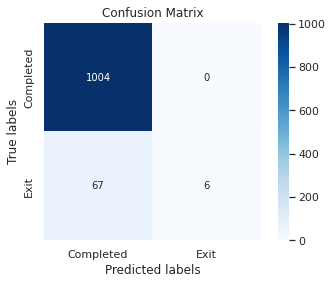

In [216]:
sns.heatmap(cf_matrix1, square=True, annot=True, cmap='Blues',fmt='d',cbar=True);
ax= plt.subplot()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Completed', 'Exit']); ax.yaxis.set_ticklabels(['Completed', 'Exit']);

# **Training Random Forest Classifier with SMOTE**

Let's try one of the resampling strategies to deal properly with our imbalances target classes: Synthetic Minority Over-sampling Technique (SMOTE). Here we're repeatedly sample with replacement from the minority class to make it of equal size as the majority class. To be more specific: We're creating new synthetic data for the minority class 

In [217]:
from imblearn.over_sampling import SMOTE

In [218]:
# view previous class distribution
print('Before Upsampling with SMOTE:'), print(dfK['Exit'].value_counts())

oversample = SMOTE()
X_resample, y_resample = oversample.fit_resample(X, y)

# view synthetic sample class distribution
print('\nAfter Upsampling with SMOTE:'), print(pd.Series(y_resample).value_counts())

Before Upsampling with SMOTE:
Completed    5342
Exit          400
Name: Exit, dtype: int64

After Upsampling with SMOTE:
Exit         4003
Completed    4003
Name: Exit, dtype: int64


(None, None)

In [219]:
# then perform ususal train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.15, random_state=400)

In [220]:
rf2=RandomForestClassifier(n_estimators=251,max_features='auto',max_depth=9,oob_score=True,n_jobs=-1,random_state=400)
rf2.fit(X_resample,y_resample)

RandomForestClassifier(max_depth=9, n_estimators=251, n_jobs=-1, oob_score=True,
                       random_state=400)

In [221]:
X_resample.shape

(8006, 400)

In [222]:
y_resample.shape

(8006,)

**OOB SCORE**

In [223]:
for w in range(10,300,20):
    rf2=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    rf2.fit(X_resample,y_resample)
    oob=rf2.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 10
OOB score is 0.9330502123407445
************************
For n_estimators = 30
OOB score is 0.952535598301274
************************
For n_estimators = 50
OOB score is 0.9527854109417937
************************
For n_estimators = 70
OOB score is 0.9545340994254309
************************
For n_estimators = 90
OOB score is 0.9554084436672495
************************
For n_estimators = 110
OOB score is 0.956407694229328
************************
For n_estimators = 130
OOB score is 0.9562827879090682
************************
For n_estimators = 150
OOB score is 0.9567824131901074
************************
For n_estimators = 170
OOB score is 0.9566575068698476
************************
For n_estimators = 190
OOB score is 0.9581563827129653
************************
For n_estimators = 210
OOB score is 0.9575318511116663
************************
For n_estimators = 230
OOB score is 0.9571571321508868
************************
For n_estimators = 250
OOB score is 0.957531851

**OOB SCORE**

In [224]:
for w in range(240,251):
    rf2=RandomForestClassifier(n_estimators=w,oob_score=True,n_jobs=-1,random_state=400)
    rf2.fit(X_resample,y_resample)
    oob=rf2.oob_score_
    print('For n_estimators = '+str(w))
    print('OOB score is '+str(oob))
    print('************************')

For n_estimators = 240
OOB score is 0.9572820384711467
************************
For n_estimators = 241
OOB score is 0.9571571321508868
************************
For n_estimators = 242
OOB score is 0.9569073195103672
************************
For n_estimators = 243
OOB score is 0.9570322258306271
************************
For n_estimators = 244
OOB score is 0.9571571321508868
************************
For n_estimators = 245
OOB score is 0.9572820384711467
************************
For n_estimators = 246
OOB score is 0.9574069447914064
************************
For n_estimators = 247
OOB score is 0.9572820384711467
************************
For n_estimators = 248
OOB score is 0.9574069447914064
************************
For n_estimators = 249
OOB score is 0.9574069447914064
************************
For n_estimators = 250
OOB score is 0.9575318511116663
************************


**PICKING THE BEST PARAMETERS**

In [225]:
param_grid = { 
    'n_estimators': [240,242,244,246,248,250,251],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2,3,4,5,6,7]
}

CV_rfs = GridSearchCV(estimator=rf2, param_grid=param_grid, cv= 5)
CV_rfs.fit(X_resample,y_resample)
print (CV_rfs.best_params_)

{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 251}


In [226]:
rf2=RandomForestClassifier(n_estimators=244,max_features='auto',max_depth=7,oob_score=True,n_jobs=-1,random_state=400)
rf2.fit(X_resample,y_resample)

RandomForestClassifier(max_depth=7, n_estimators=244, n_jobs=-1, oob_score=True,
                       random_state=400)

In [227]:
# predict 
y_test_preds2 = rf2.predict(X_resample)

In [228]:
# evaluate
report = classification_report(y_resample, y_test_preds2)

In [229]:
print('Classification Report Random Forest - with  SMOTE Upsampling: \n', report)

Classification Report Random Forest - with  SMOTE Upsampling: 
               precision    recall  f1-score   support

   Completed       0.89      0.85      0.87      4003
        Exit       0.85      0.89      0.87      4003

    accuracy                           0.87      8006
   macro avg       0.87      0.87      0.87      8006
weighted avg       0.87      0.87      0.87      8006



In [230]:
cf_matrix2 = metrics.confusion_matrix(y_resample, y_test_preds2)
print(2)

2


**FINAL CONFUSION MATRIX**

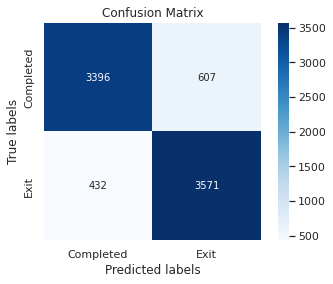

In [231]:
sns.heatmap(cf_matrix2, square=True, annot=True, cmap='Blues',fmt='d',cbar=True);
ax= plt.subplot()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Completed', 'Exit']); ax.yaxis.set_ticklabels(['Completed', 'Exit']);

In [232]:
rf2.feature_importances_

array([6.03844020e-02, 1.72548227e-02, 3.63849295e-02, 0.00000000e+00,
       3.95436872e-05, 3.53869182e-03, 1.00098467e-04, 6.50828816e-05,
       0.00000000e+00, 1.88189816e-05, 0.00000000e+00, 4.11575968e-05,
       2.37039290e-02, 0.00000000e+00, 9.10592548e-07, 1.61869194e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.51465589e-03, 1.41426465e-05, 0.00000000e+00, 1.53175602e-03,
       6.09988318e-05, 5.34248308e-03, 7.89332895e-06, 0.00000000e+00,
       5.76082017e-07, 8.81654584e-04, 7.67368801e-06, 3.18642693e-05,
       0.00000000e+00, 6.47012015e-04, 2.08614178e-04, 1.43710117e-05,
       1.91558044e-05, 1.28293905e-07, 1.17969117e-03, 3.75704471e-05,
       0.00000000e+00, 3.11040595e-06, 9.36307368e-05, 2.90034417e-04,
       3.47079462e-06, 0.00000000e+00, 5.98905955e-08, 0.00000000e+00,
       8.13157306e-05, 1.36232261e-06, 4.44612138e-04, 0.00000000e+00,
       0.00000000e+00, 3.95421930e-04, 8.48805677e-04, 5.19882020e-06,
      

In [233]:
feat_imp=pd.Series(rf2.feature_importances_,index=X.columns.tolist())


**FINAL FEATURES IMPORTANCES**

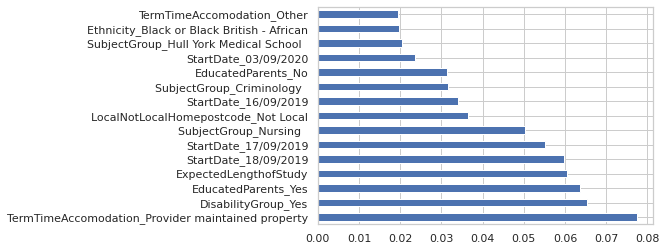

In [234]:
feat_imp.sort_values(ascending=False).head(15).plot(kind='barh')